In [1]:
function readCollIn(f,first,last)
    # this reads in a csv file
    r=0
    data = readdlm(f,',',String,'\n')
    return data[first:last]
end

function convertData(data)
    # this assumes all the data presented are floats except the last one which is a boolean
    last = length(data)
    converted = zeros(last)
    for i=1:last-1
        converted[i] = parse(Float64,data[i])
    end
    converted[last] = parse(Bool,data[last])
    return converted
end

function appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
    append!(r,data[1]);append!(v,data[2]);append!(t,data[3])
    append!(E1,data[4]);append!(pr1,data[5]);append!(pz1,data[6]);append!(E2,data[7]);append!(pr2,data[8]);append!(pz2,data[9])
    append!(Eion1,data[10]);append!(prion1,data[11]);append!(pzion1,data[12]);append!(Eion2,data[13]);append!(prion2,data[14]);append!(pzion2,data[15])
    append!(ion,data[16]);append!(minD,data[17]);append!(vPerp,data[18]);append!(cross,data[19])
    return r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross
end

function plotThing(Nc,Ni,dt,dthing,colls,ions,first,last,title1,xlabel1,ylabel1)
    """
    Nc,Ni are the numbers of collisional particles and ions to plot
    first,last are the bounds 
    colls,ions are the vectors of what we want to plot for 
    dt,dthing are the time step and the step of the thing we want to plot for
    """
    # Now we plot their positions over time
    for i=1:Nc
        plot(dt.*range(first,last),dthing.*colls[i,first:last])
    end
    for i=1:Ni
        plot(dt.*range(first,last),dthing.*ions[i,first:last])
    end
    xlabel(xlabel1)
    ylabel(ylabel1)
    title(title1)
    show()    
end

function plotPieceWise(Nc,Ni,dthing1,dthing2,colls1,ions1,colls2,ions2,first,last,title1,xlabel1,ylabel1,xlow,xhigh,ylow,yhigh)
    """
    Nc,Ni are the numbers of collisional particles and ions to plot
    first,last are the bounds 
    colls,ions are the vectors of what we want to plot for 
    dthing1,dthing2 are the step of the first param we want to plot and the step of the second param we want to plot for
    """
    for i=1:Nc
        scatter(dr.*rcolls[i,first:last],dz.*zcolls[i,first:last])
    end
    for i=1:Ni
        scatter(dr.*rs[i,first:last],dz.*zs[i,first:last])
    end

    xlabel(xlabel1)
    ylabel(ylabel1)
    title(title1)

    ax = gca()
    # add new limits from 0 - 100
    ax[:set_xlim]([xlow,xhigh])
    ax[:set_ylim]([ylow,yhigh])
    show()
end

function subPlotThings(N1,N2,dt,dthing1,dthing2,thing1,thing2,first,last,title1,xlabel1,ylabel1,ylabel2)
    """
    N1,N2 are the numbers of particles to plot
    first,last are the bounds 
    colls,ions are the vectors of what we want to plot for 
    dthing1,dthing2 are the step of the first param we want to plot and the step of the second param we want to plot for
    """
    subplot(211)
    for i=1:Ni
        plot(dt.*range(first,last),dthing1.*thing1[i,first:last])
    end
    #xlabel("Time (s)")
    ylabel(ylabel1)
    subplot(212)
    for i=1:Ni
        plot(dt.*range(first,last),dthing2.*thing2[i,first:last])
    end
    xlabel(xlabel1)
    ylabel(ylabel2)
    suptitle(title1)
    show()
end 

function binPlotThing(xVector,yVector,Nbins,title1,xLabel,yLabel,xlow,xhigh,useYerr=true)
    # first we'll sort the xVector and yVector so that they represent matched coordinates of the xvector ascending
    perm = sortperm(xVector)
    newX = xVector[perm]; newY = yVector[perm]
    
    # next we get the average and std from the binned values
    binSize = length(newX)÷ Nbins
    aveX = zeros(Nbins);aveY = zeros(Nbins)
    stdX = zeros(Nbins);stdY = zeros(Nbins)
    for i=1:Nbins
        j=(i-1)*binSize+1
        aveX[i] = mean(newX[j:j+binSize-1]);aveY[i] = mean(newY[j:j+binSize-1]) 
        stdX[i] = std(newX[j:j+binSize-1]);stdY[i] = std(newY[j:j+binSize-1]) 
    end
    
#     println("aveX = ",aveX);println("aveY = ",aveY)
#      println("stdX = ",stdX);println("stdY = ",stdY)
    # next we plot the results with their error bars
    if useYerr
         errorbar(aveX,aveY,xerr=stdX,yerr=stdY./binSize^0.5,fmt="o")
    else
        errorbar(aveX,aveY,xerr=stdX,fmt="o")
    end
    xlabel(xLabel)
    ylabel(yLabel)
    title(title1)
    ax = gca()
    # add new limits from 0 - 100
    ax[:set_xlim]([xlow,xhigh])
    show()
end
# data has the form of [r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross]

binPlotThing (generic function with 2 methods)

In [2]:
using PyCall,PyPlot,Statistics,DelimitedFiles
file = "B and V scan.csv"
f = open(file,"r")
    eof = length(readlines(f))
close(f)
first =2 ; last = first+18
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
#first =21 ; last = first+18
for i=2:19:eof-19
    data = readCollIn(file,i,i+18)
    data = convertData(data)
    #println(data)
    r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

LoadError: ArgumentError: cannot parse "" as Float64

In [9]:
# This cell uses the above data to determine which of these collisions are langevin collisions
# These all read as langevin, which means something is wrong with my minimum distance calculation
# I might switch the calc to measure kinetic vs potential energy  as the msmt

langevin = []
for i=1:length(r)
    if minD<r
        append!(langevin,true)
    else
        append!(langevin,false)
    end
end
#print(langevin)

In [13]:
np = pyimport("numpy")

# This cell integrates reorder fraction across the impact parameters r
# We'll treat the rate of collision cross-section as a circle around each ion and treat the re-order rate as uniform in phi
# This means that the average of the first half of the r's with the last half will give our actual fractional re-order
freorder = np.zeros(100) # make variable lists, there are 100 velocities
binsize = np.zeros(100)
for i=1:length(r) 
    j = convert(UInt32,round(v[i]/50.0)) # the first velocity is 50, so this should go 1 to 80
    freorder[j]+=cross[i] # we sum the reordering collisions
    binsize[j]+=1.0 # we track how many collisions we measure
end
freorder = freorder./binsize # we take the number of reorders over the binsize to get the reorder probability

100-element Vector{Float64}:
 0.0
 0.45
 0.3625
 0.1875
 0.175
 0.1625
 0.15
 0.1375
 0.1375
 0.125
 0.125
 0.125
 0.1125
 ⋮
 0.05
 0.05
 0.05
 0.05
 0.05
 0.05
 0.05
 0.05
 0.05
 0.0375
 0.05
 0.05

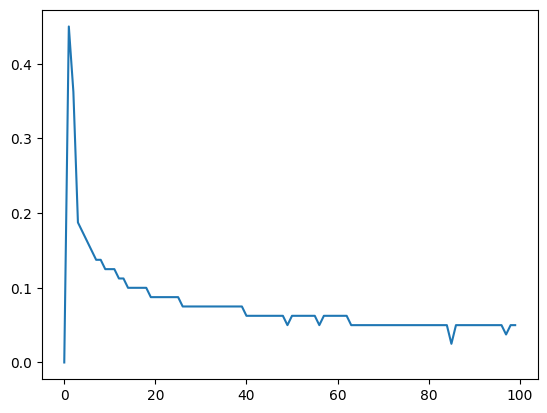

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5ae0cb970>

In [18]:
plot(freorder)

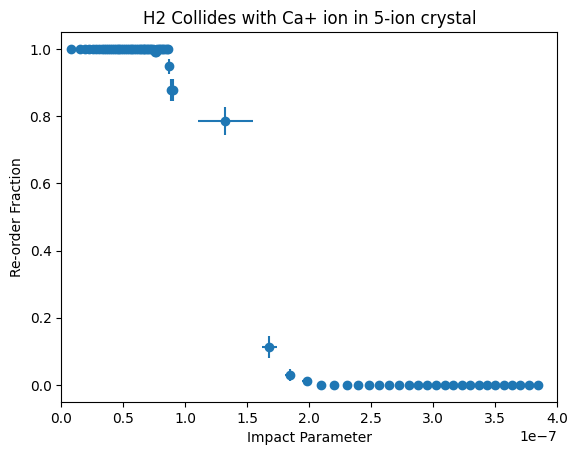

In [28]:
binPlotThing(minD,cross,79,"H2 Collides with Ca+ ion in 5-ion crystal","Impact Parameter","Re-order Fraction",0.0,0.4e-6,true)

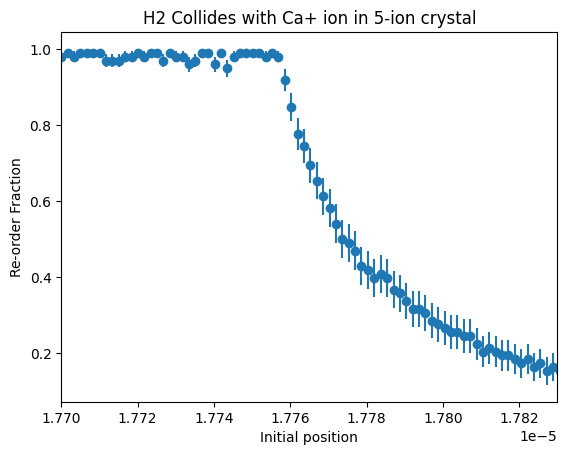

In [25]:
binPlotThing(r,cross,79,"H2 Collides with Ca+ ion in 5-ion crystal","Initial position","Re-order Fraction",1.770e-5,1.783e-5,true)

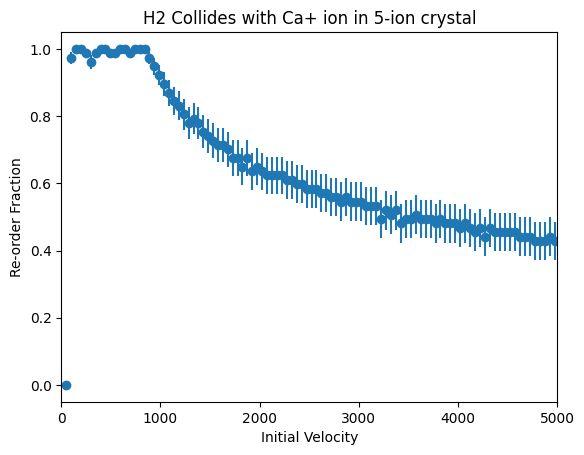

In [4]:
binPlotThing(v,cross,100,"H2 Collides with Ca+ ion in 5-ion crystal","Initial Velocity","Re-order Fraction",0.0,5e3,true)

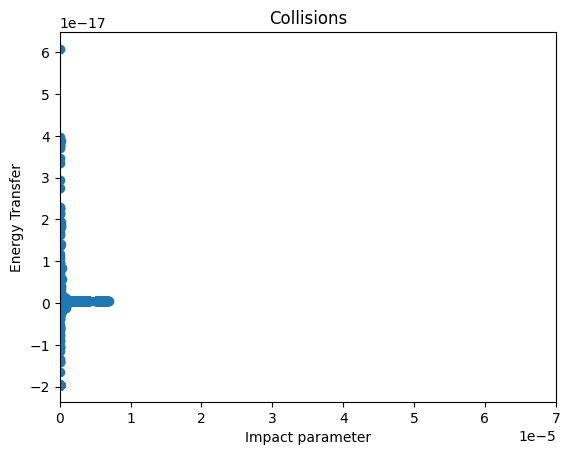

In [5]:
using PyCall,PyPlot,Statistics
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(minD,(Eion2-Eion1))
xlabel("Impact parameter")
ylabel("Energy Transfer")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,0.7e-4])
#ax[:set_ylim]([-2e-26,0.0])

show()    

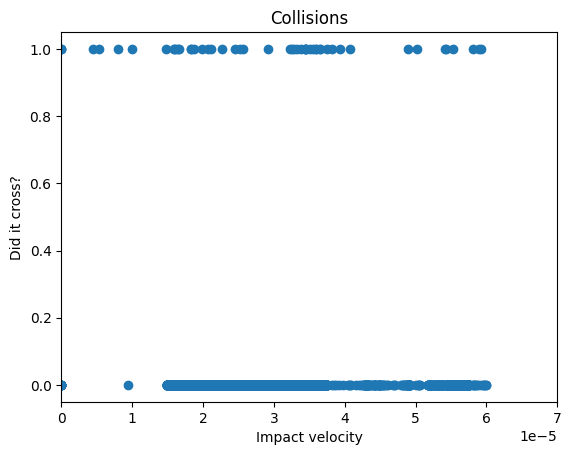

In [21]:
using PyCall,PyPlot
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(minD,cross)
xlabel("Impact velocity")
ylabel("Did it cross?")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,0.7e-4])
#ax[:set_ylim]([-2e-26,0.0])

show()    

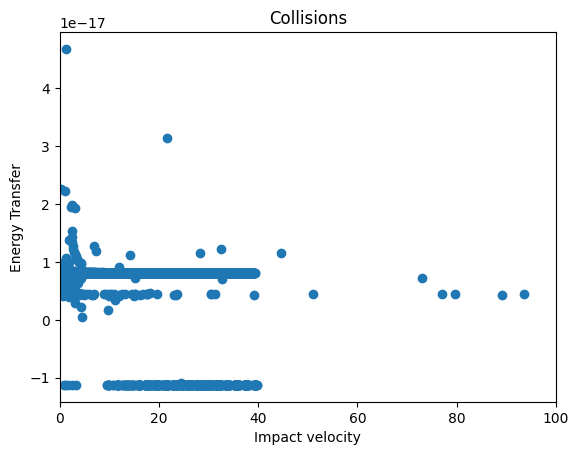

In [22]:
using PyCall,PyPlot
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(vPerp,(Eion2-Eion1))
xlabel("Impact velocity")
ylabel("Energy Transfer")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,1.0e2])
#ax[:set_ylim]([-2e-26,0.0])

show()   

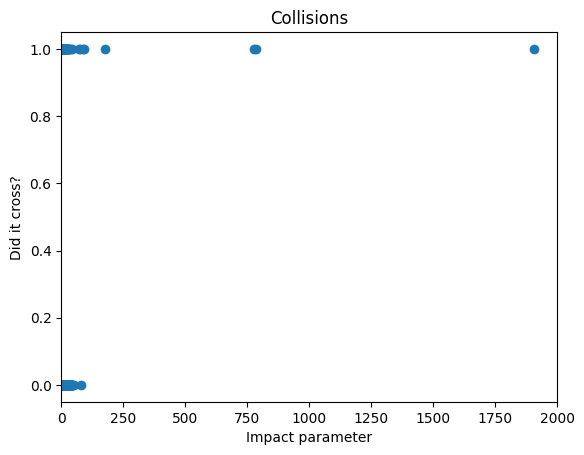

In [15]:
using PyCall,PyPlot
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(vPerp,cross)
xlabel("Impact parameter")
ylabel("Did it cross?")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,2.0e3])
#ax[:set_ylim]([-2e-26,0.0])

show()   

In [192]:
println(E2)

Any[-0.0012049850213057198, -0.0012049850213057202, -0.0012049850213057213, -0.0012049850213057224, -0.0012049850213057237, -0.001204985021305725, -0.001204985021305726, -0.0012049850213057271, -0.0012049850213057276, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305692, -0.0012049850213056944, -0.001204985021305698, -0.0012049850213057029, -0.001204985021305708, -0.0012049850213057133, -0.0012049850213057178, -0.0012049850213057215, -0.001204985021305724, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213056463, -0.001204985021305

 -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213056463, -0.0012049850213056515, -0.00120498502130566, -0.001163319090468309, -0.0012049850213056818, -0.0012049850213056935, -0.001204985021305704, -0.0012049850213057124, -0.0012049850213057176, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213055819, -0.0012049850213055914, -0.0012049850213056061, -0.0012049850213056248, -0.0012049850213056454, -0.001204985021305666, -0.0012049850213056846, -0.0012049850213056994, -0.001204985021305709, -0.0012049850213057289, -0.001204985021305728

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213055819, -0.0012049850213055914, -0.0012049850213056061, -0.0012049850213056248, -0.0012049850213056454, -0.001204985021305666, -0.0012049850213056846, -0.0012049850213056994, -0.001204985021305709, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213054992, -0.001204985021305514, -0.001204985021305537, -0.0012049850213055662, -0.0012049850213055983, -0.0012049850213056307, -0.0012049850213056597, -0.001204985021305683, -0.0012049850213056977, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057

 -0.001204985021305683, -0.0012049850213056977, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213052785, -0.0012049850213053076, -0.0012049850213053529, -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.001204985021305667

 -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213051408, -0.0012049850213051788, -0.0012049850213052377, -0.0012049850213053123, -0.001204985021305395, -0.0012049850213054773, -0.001204985021305552, -0.0012049850213056111, -0.001204985021305649, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.0012049850213053063, -0.0012049850213054106, -0.0012049850213055049, -0.0012049850213055797, -0.0012049850213056278, -0.0012049850213057289, -0.001204985021305

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.0012049850213053063, -0.0012049850213054106, -0.0012049850213055049, -0.0012049850213055797, -0.0012049850213056278, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130481, -0.0012049850213048693, -0.0012049850213049617, -0.001204985021305078, -0.001204985021305207, -0.001204985021305336, -0.0012049850213054524, -0.0012049850213055448, -0.001204985021305604, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130572

 -0.0012049850213055448, -0.001204985021305604, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021304617, -0.0012049850213046887, -0.0012049850213048004, -0.0012049850213049413, -0.0012049850213050974, -0.0012049850213052536, -0.0012049850213053943, -0.0012049850213055062, -0.001204985021305578, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213044055, -0.001204985021304491, -0.001204985021304624, -0.0012049850213047917, -0.0012049850213049773, -0.0012049850213051631, -0.0012049850213053308, -0.0012049850213054637, -0.00120498502130554

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012016006406875101, -0.001204985021304491, -0.001204985021304624, -0.0012049850213047917, -0.0012049850213049773, -0.0012049850213051631, -0.0012049850213053308, -0.0012049850213054637, -0.0012049850213055491, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213041759, -0.001204985021304276, -0.0012049850213044322, -0.0012049850213046288, -0.001204985021304847, -0.001204985021305065, -0.0012049850213052616, -0.0012049850213054177, -0.001204985021305518, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130572

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305692, -0.0012049850213056944, -0.001204985021305698, -0.0012049850213057029, -0.001204985021305708, -0.0012049850213057133, -0.0012049850213057178, -0.0012049850213057215, -0.001204985021305724, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213056463, -0.0012049850213056515, -0.00120498502130566, -0.0012049850213056703, -0.0012049850213056818, -0.0012049850213056935, -0.001204985021305704, -0.0012049850213057124, -0.0012049850213057176, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305728

 -0.0012049850213056515, -0.00120498502130566, -0.0012049850213056703, -0.0012049850213056818, -0.0012049850213056935, -0.001204985021305704, -0.0012049850213057124, -0.0012049850213057176, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213055819, -0.0012049850213055914, -0.0012049850213056061, -0.0012049850213056248, -0.0012049850213056454, -0.001204985021305666, -0.0012049850213056846, -0.0012049850213056994, -0.001204985021305709, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213054992, -0.001204985021305514, -0.001204985021305537

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213054992, -0.001204985021305514, -0.001204985021305537, -0.0012049850213055662, -0.0012049850213055983, -0.0012049850213056307, -0.0012049850213056597, -0.001204985021305683, -0.0012049850213056977, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130572

 -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213052785, -0.0012049850213053076, -0.0012049850213053529, -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.0012049850213056677, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130514

-0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213052785, -0.0012049850213053076, -0.0012049850213053529, -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.0012049850213056677, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305728

 -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.0012049850213056677, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213051408, -0.0012049850213051788, -0.0012049850213052377, -0.0012049850213053123, -0.001204985021305395, -0.0012049850213054773, -0.001204985021305552, -0.0012049850213056111, -0.001204985021305649, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.00120498502130530

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.0012049850213053063, -0.0012049850213054106, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130481, -0.0012049850213048693, -0.0012049850213049617, -0.001204985021305078, -0.001204985021305207, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305

, -0.00120498502130481, -0.0012049850213048693, -0.0012049850213049617, -0.001204985021305078, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021304617, -0.0012049850213046887, -0.0012049850213048004, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213044055, -0.001204985021304

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213044055, -0.001204985021304491, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213041759, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021

 -0.0012049850213057289, -0.0012049850213044055, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502

In [23]:
test = [1,2,3,4]
println(test[1:3])

[1, 2, 3]
